In [1]:
import argparse
import numpy as np
import networkx as nx
import slam.plot as splt
import slam.topology as stop
import slam.generate_parametric_surfaces as sgps
import trimesh
import os

In [2]:
nb_runs = 10
nb_graphs = 3
nb_vertices = 85
min_noise = 50
max_noise = 51
step_noise = 20
min_outliers = 10
max_outliers = 11
step_outliers = 10
save_reference = 1
radius = 100

In [11]:
list_noise = np.arange(min_noise, max_noise, step_noise)

In [8]:
list_outliers = np.array(list(range(min_outliers, max_outliers, step_outliers)))

In [17]:
for noise in list_noise:
    for outliers in list_outliers:
        print(outliers,noise)

10 50


In [3]:
sphere_random = sgps.generate_sphere_random_sampling(vertex_number=nb_vertices, radius=radius)

In [4]:
sphere_random

<trimesh.Trimesh(vertices.shape=(85, 3), faces.shape=(166, 3))>

In [6]:
adja = stop.edges_to_adjacency_matrix(sphere_random)

In [7]:
mm = adja.todense()

In [8]:
mm[0,:]

matrix([[0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]], dtype=int8)

In [9]:
graph = nx.from_numpy_matrix(adja.todense())

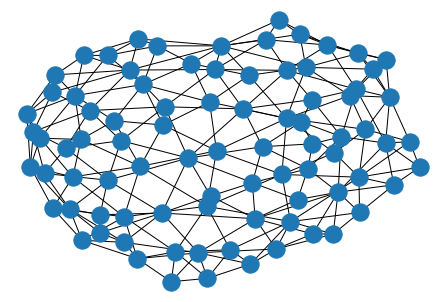

In [17]:
nx.draw(graph)

In [14]:
nx.adjacency_matrix(graph).todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [47]:
nx.degree(graph)

DegreeView({0: 8, 1: 9, 2: 5, 3: 4, 4: 6, 5: 5, 6: 6, 7: 9, 8: 6, 9: 7, 10: 4, 11: 4, 12: 6, 13: 6, 14: 4, 15: 8, 16: 6, 17: 7, 18: 8, 19: 7, 20: 6, 21: 3, 22: 7, 23: 7, 24: 6, 25: 6, 26: 7, 27: 5, 28: 6, 29: 6, 30: 10, 31: 5, 32: 5, 33: 7, 34: 5, 35: 8, 36: 5, 37: 7, 38: 6, 39: 4, 40: 5, 41: 6, 42: 5, 43: 5, 44: 5, 45: 6, 46: 8, 47: 4, 48: 4, 49: 9, 50: 5, 51: 6, 52: 7, 53: 5, 54: 3, 55: 6, 56: 7, 57: 7, 58: 7, 59: 4, 60: 7, 61: 6, 62: 4, 63: 4, 64: 5, 65: 5, 66: 6, 67: 5, 68: 3, 69: 8, 70: 6, 71: 5, 72: 5, 73: 7, 74: 6, 75: 6, 76: 5, 77: 4, 78: 7, 79: 5, 80: 5, 81: 11, 82: 4, 83: 4, 84: 5})

In [53]:
graph.number_of_nodes()

85

In [56]:
def geodesic_distance_sphere(coord_a, coord_b, radius):
    ''' Return the geodesic distance of two 3D vectors on a sphere
    '''
    return radius * np.arccos(np.clip(np.dot(coord_a, coord_b) / np.power(radius,2),-1,1))

def graph_from_mesh(mesh):
    # Get the adjacency graph
    #########################################################
    # that fucking function is bugged!!!!!!!!!!!!!!!!!!!!
    # graph = sphere_random_sampling.vertex_adjacency_graph
    #########################################################
    adja = stop.edges_to_adjacency_matrix(mesh)
    graph = nx.from_numpy_matrix(adja.todense())
    # to be tested graph = nx.from_edgelist(sphere_random_sampling.edges_sorted)

    # Create dictionnary that will hold the attributes of each node
    node_attribute_dict = {}
    for node in graph.nodes():
        node_attribute_dict[node] = {"coord": np.array(mesh.vertices[node])}

    # add the node attributes to the graph
    nx.set_node_attributes(graph, node_attribute_dict)

    # We add a default weight on each edge of 1
    nx.set_edge_attributes(graph, 1.0, name="weight")

    # We add a geodesic distance between the two ends of an edge
    edge_attribute_dict = {}
    id_counter = 0 # useful for affinity matrix caculation
    for edge in graph.edges:

        # We calculate the geodesic distance
        end_a = graph.nodes()[edge[0]]["coord"]
        end_b = graph.nodes()[edge[1]]["coord"]
        geodesic_dist = geodesic_distance_sphere(end_a, end_b, radius)

        # add the information in the dictionnary
        edge_attribute_dict[edge] = {"geodesic_distance": geodesic_dist, "id":id_counter}
        id_counter += 1

    # add the edge attributes to the graph
    nx.set_edge_attributes(graph, edge_attribute_dict)
    return graph

In [62]:
simu_graph = graph_from_mesh(sphere_random)

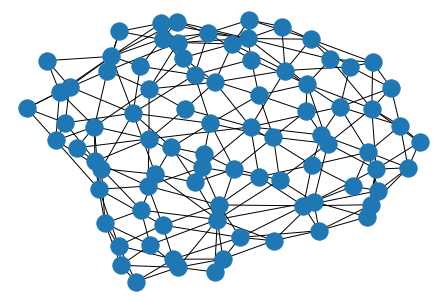

In [63]:
nx.draw(simu_graph)

In [71]:
#nx.get_edge_attributes(simu_graph,"geodesic_distance")

In [75]:
np.arange(min_noise, max_noise, step_noise)

array([50])

In [79]:
min_=1
max_=10
step_out = 1

In [80]:
np.array(list(range(min_, max_, step_out)))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
list_1 = [(1,2),(3,2),(5,3),(7,5)]
list_2 = [(3,2),(3,1),(7,3),(7,5),(3,5)]

In [91]:
len(set(list_2).intersection(set(list_1)))

2

In [19]:
import pickle

In [92]:
arr = np.load("ground_truth.npy")

In [24]:
ref_graph = pickle.load(open('ref_graph.gpickle', 'rb'))
noisy_graph = pickle.load(open('noisy_graph.gpickle', 'rb'))

In [25]:
ref_graph

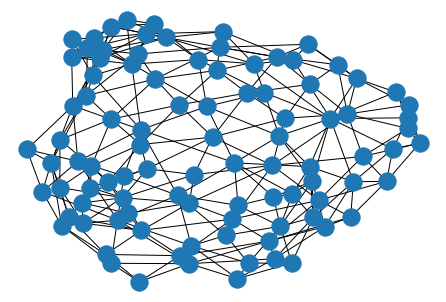

In [26]:
nx.draw(ref_graph)

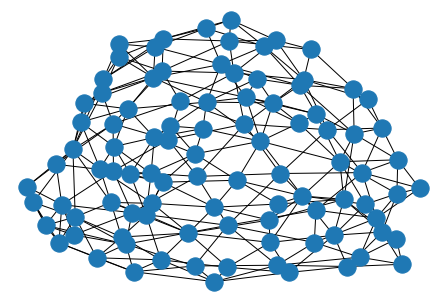

In [27]:
nx.draw(noisy_graph)

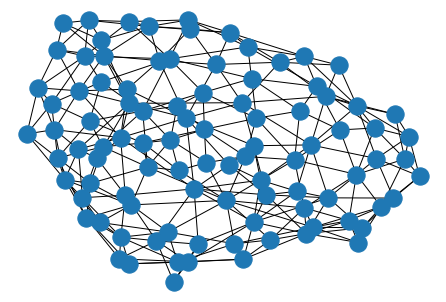

In [30]:
nx.draw(noisy_graph,edges = noisy_graph.edges)

In [28]:
noisy_graph.edges

EdgeView([(0, 56), (0, 83), (0, 85), (0, 40), (0, 36), (0, 4), (0, 64), (0, 53), (1, 56), (1, 24), (1, 17), (1, 73), (1, 54), (1, 76), (2, 65), (2, 80), (2, 50), (2, 38), (2, 3), (3, 80), (3, 38), (3, 68), (3, 88), (4, 83), (4, 87), (4, 64), (4, 13), (4, 67), (4, 93), (5, 23), (5, 73), (5, 14), (5, 84), (6, 44), (6, 31), (6, 57), (6, 89), (6, 92), (7, 83), (7, 34), (7, 21), (7, 48), (7, 60), (7, 75), (7, 13), (7, 77), (7, 18), (7, 67), (7, 90), (8, 10), (8, 22), (8, 86), (8, 31), (8, 26), (9, 59), (9, 29), (9, 21), (9, 41), (9, 77), (9, 32), (10, 52), (10, 45), (10, 22), (10, 26), (10, 70), (10, 94), (11, 45), (11, 40), (11, 36), (11, 51), (11, 69), (11, 47), (12, 59), (12, 44), (12, 58), (12, 29), (12, 57), (12, 50), (12, 15), (12, 46), (12, 92), (13, 83), (13, 67), (13, 93), (14, 17), (14, 73), (14, 80), (14, 68), (14, 84), (14, 30), (14, 37), (14, 95), (15, 44), (15, 50), (15, 30), (15, 92), (16, 86), (16, 39), (16, 23), (16, 54), (16, 31), (16, 82), (17, 73), (17, 63), (17, 76), (1